Max Wang<br>
PHYS 434<br>
Lab 6<br>
Partner: Alexander Hyde

In [3]:
%matplotlib inline
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import random
plt.rcParams['figure.figsize'] = (20,10)

## Problem 1

We start out of a Poisson background with mean of 100 with 1 million samples as our fake data. The 5-Sigma sensitivity threshold is as follows. 

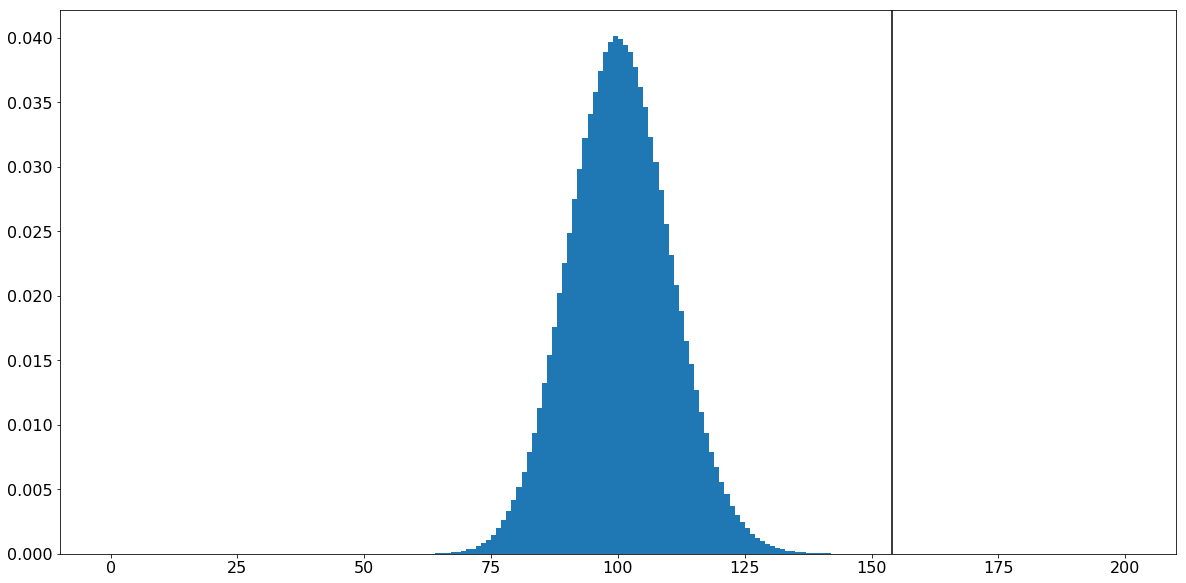

The 5-sigma sensitivity threshold of the fake background distribution is 154.0


In [4]:
x = np.linspace(0, 200, 201)
bkgd = stats.poisson.rvs(100,0,1000000)
sigma5 = stats.poisson.ppf(stats.norm.cdf(5,0,1), 100)
plt.hist(bkgd,x,density=True)
plt.axvline(sigma5,color='black')
plt.tick_params(labelsize=16)
plt.show()
print('The 5-sigma sensitivity threshold of the fake background distribution is ' + str(sigma5))

## Problem 2

<b>a)</b> Now I am going to add a moderately strong signal of known strength. Though the specs say that the signal should be in the 8~30-Sigma range, but realistically the machine cannot calculate for such small numbers. So around 190~200, the values are small enough for the machine to interpret is infinity. Hence I chose 190 just for clarity sake.

In [5]:
signalStr = stats.norm.ppf(stats.poisson.cdf(190,100))
print('The signal being injected is 190, which is of strength ' + str(signalStr) + ' sigma')

The signal being injected is 190, which is of strength 8.041399959096541 sigma


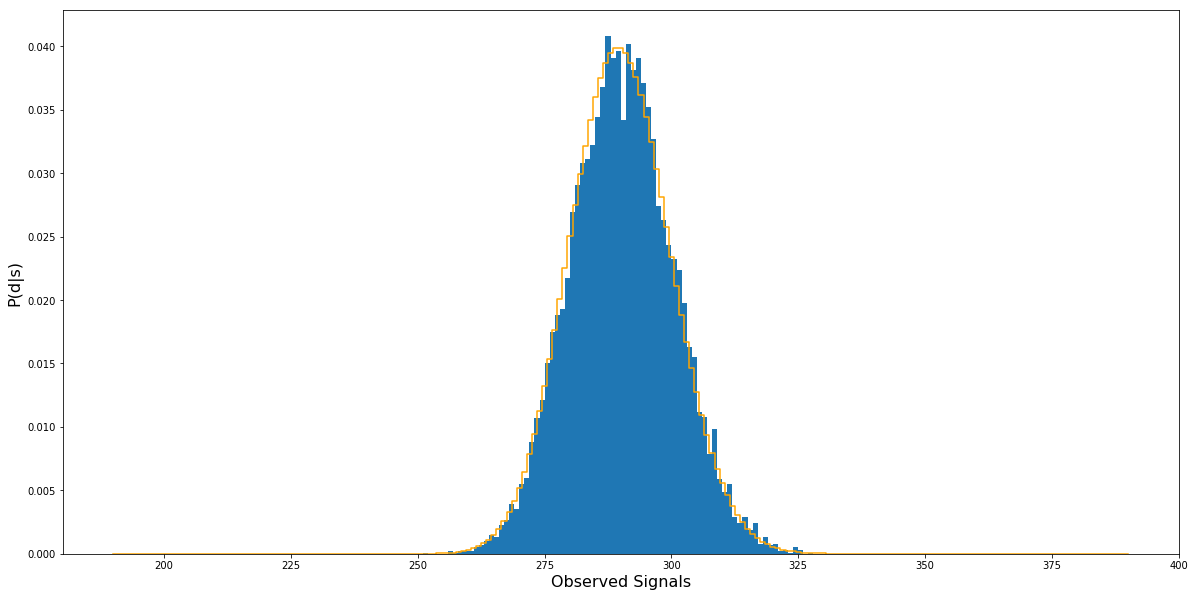

In [6]:
signal_x = x + 190
Pds = stats.poisson.pmf(signal_x,100,190)
newDist = []
for i in range(10000):
    newDist.append(bkgd[random.randrange(0,len(bkgd))])
newDist = np.add(newDist,190)
plt.hist(newDist,signal_x,density=True)
plt.step(signal_x,Pds,where="mid",color="orange")
plt.xlabel("Observed Signals",fontsize=16)
plt.ylabel("P(d|s)",fontsize=16)
plt.show()

To simulate the distribution for our inject signal of 190, I randomly took 50k observations from the background and shifted them by 190. Basically, this distribution is the result of measuring a signal of 190 50k times. Due to its randomness, the data is less smooth, as seen compared to the PDF of our P(d|s), or the actual Poisson with mean of 100 shifted by 190. Since our sample size is quite high, the shape of the distribution is quite Gaussian-like, as expected due to central limit theorm.

<b>b)</b> Looking at the y-axis of the distribution alone, we can see that the observed signals are biased to be much stronger than the true signal, 100 units more to be exact. As for symmetry, again the distribution is quite Gaussian-like, and because of our high sample size a Poisson distribution like this tends to be pretty symmetric.

## Problem 3

<b>a)</b> New I am going to simulate the injection of a range of signals, which will need to be represented by a 2D density histogram. I will first make another 1 million samples of random true signals between 150 to 500, and then I will add the signals to the background Poisson we made from problem 1 to simulate observed data with injection.

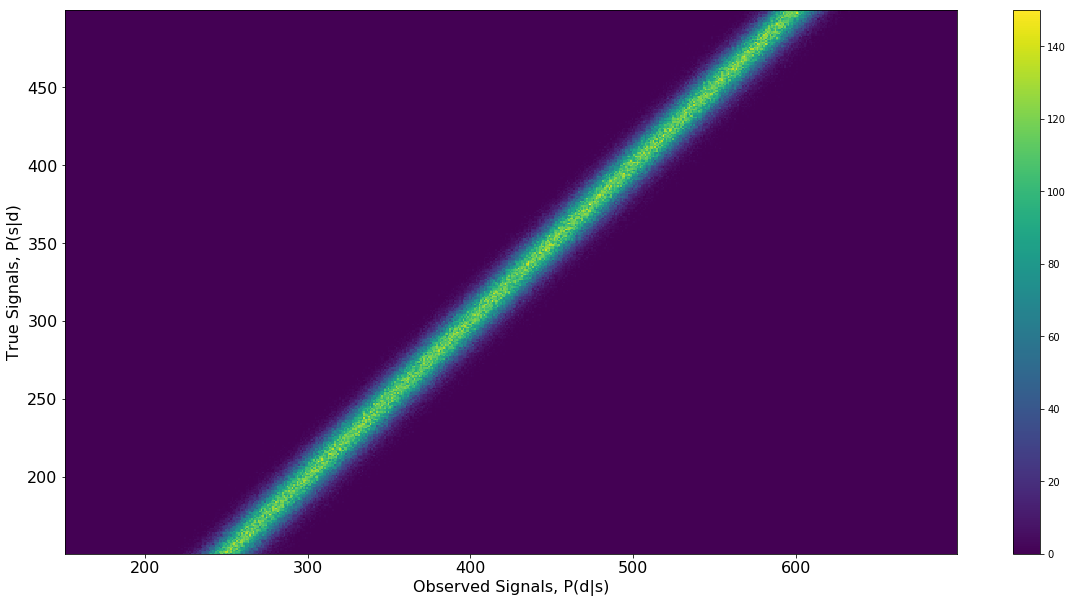

In [7]:
signal = stats.uniform.rvs(150,350,1000000)
data = bkgd + signal
signalx = np.linspace(150,500,351)
datax = np.linspace(150,700,551)
Psd, temp, temp2 = np.histogram2d(data,signal,bins=[datax,signalx])
datacenters = (datax[:-1] + datax[1:]) / 2
signalcenters = (signalx[:-1] + signalx[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.xlabel("Observed Signals, P(d|s)",fontsize=16)
plt.ylabel("True Signals, P(s|d)",fontsize=16)
plt.tick_params(labelsize=16)
plt.colorbar()
plt.show()

<b>b)</b> Using this new 2D density distribution, we are going to try and replicate the process and result from problem 2. Hence, we want to take a horizontal slice across the distribution where y = 190, with ± 1. 

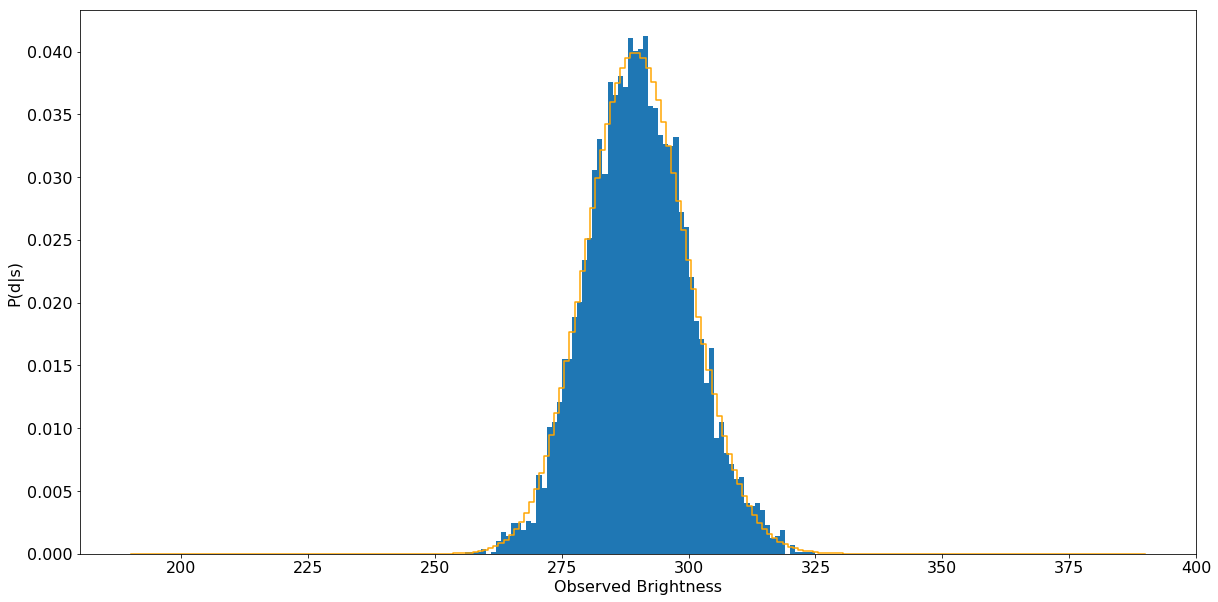

In [8]:
obsSlice = []
for i in range(len(signal)):
    if signal[i] >= (190 - 1) and signal[i] < (190 + 1):
        obsSlice.append(data[i])
plt.hist(obsSlice,signal_x,density=True)
Pds = stats.poisson.pmf(signal_x,100,190)
plt.step(signal_x,Pds,where="mid",color="orange")
plt.xlabel("Observed Brightness",fontsize=16)
plt.ylabel("P(d|s)",fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

The above plot is an attemped replication of the one from problem 2. To compare the two distributions, I will compare both their means and standard deviations with ratios.

In [9]:
print("The ratio of mean is " + str(np.mean(newDist)/np.mean(obsSlice)))
print("The ratio of StD is " + str(np.std(newDist)/np.std(obsSlice)))

The ratio of mean is 0.9989710410541528
The ratio of StD is 1.0082089764703637


The ratios are very close to 1, and with random interferance I would conclude that I got relatively the same answer.

<b>c)</b> Now we want to reverse the problem: instead of seeing our observed distribution based on a true signal, we want to see our true signal distribution based on a particular observed signal, which in this case I picked 420. Hence, we would want a vertical slice this time, where x = 420, with ± 1. 

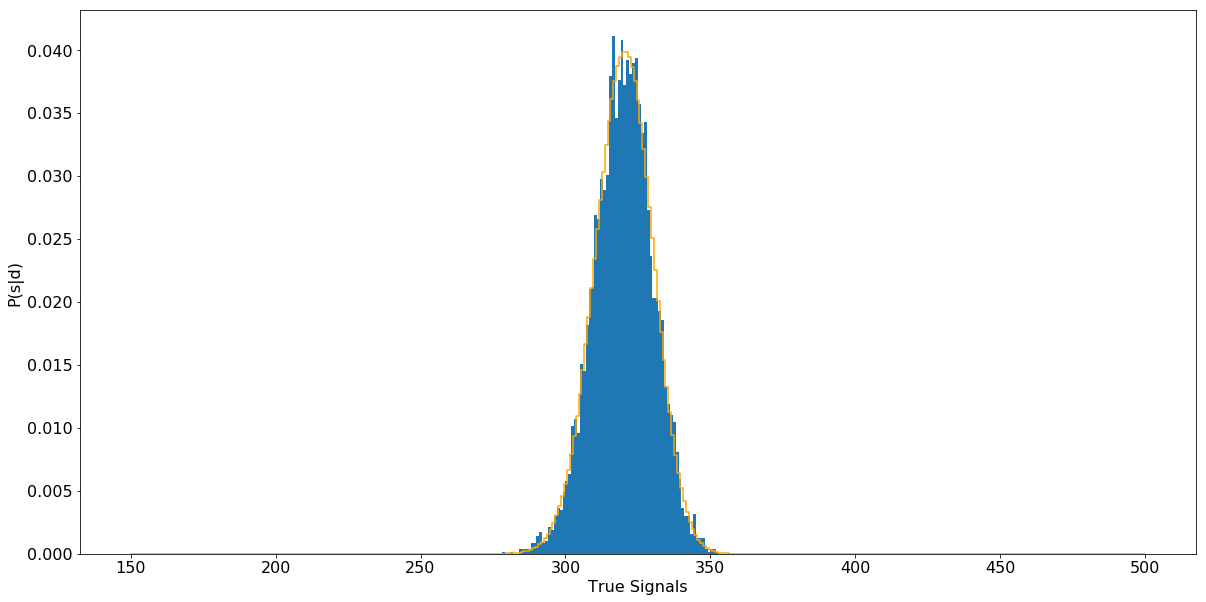

In [15]:
trueSlice = []
for i in range(len(data)):
    if data[i] >= (420 - 1) and data[i] < (420 + 1):
        trueSlice.append(signal[i])
Psd = np.multiply(stats.poisson.pmf(420,100,signalx),stats.uniform.pdf(signalx,150,350))
plt.hist(trueSlice,signalx,density=True)
plt.step(signalx,Psd/sum(Psd),where="mid",color="orange")
plt.xlabel("True Signals",fontsize=16)
plt.ylabel("P(s|d)",fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

<b>d)</b> Here I want to find the 1-Sigma uncertainity on the true signal strength. To do so, I first sorted the distribution, and then basically integrated the distribution from left to right until I reached approximately the 1-Sigma CDF of the distribution. The black lines represents the ±1-Sigma location, and the orange line represents the mean.

In [18]:
def sig1(positive):
    sig1Area = 1-stats.norm.cdf(1,0,1)+0.5
    if not positive:
        sig1Area = 0.5-(1-stats.norm.cdf(1,0,1))
    signalArea = 0
    sig1Signal = 0
    for i in range(len(trueSlice)):
        signalArea += np.sum(trueSlice[i])/np.sum(trueSlice)
        if signalArea >= sig1Area:
            sig1Signal = trueSlice[i]
            return sig1Signal

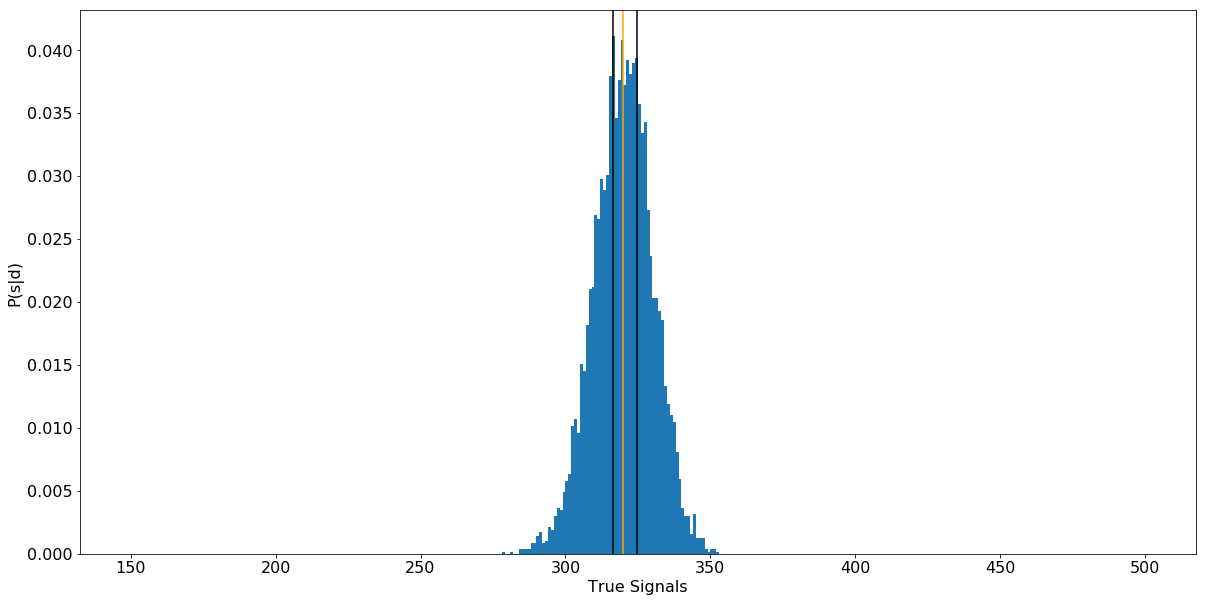

The 1-Sigma uncertainity is located at x = 324.59414295744057
The -1-Sigma uncertainity is located at x = 316.33851454409444


In [19]:
trueSlice.sort()
posSig1 = sig1(True)
negSig1 = sig1(False)
plt.hist(trueSlice,signalx,density=True)
plt.axvline(np.mean(trueSlice),color="orange")
plt.axvline(posSig1,color="black")
plt.axvline(negSig1,color="black")
plt.xlabel("True Signals",fontsize=16)
plt.ylabel("P(s|d)",fontsize=16)
plt.tick_params(labelsize=16)
plt.show()
print('The 1-Sigma uncertainity is located at x = ' + str(posSig1))
print('The -1-Sigma uncertainity is located at x = ' + str(negSig1))

<b>e)</b> In terms of symmetry, it still does look quite symmetric, but since we have less samples than the distribution from problem 2, I am going to try and compare the distance between mean and the ±1-Sigmas again using a ratio.

In [20]:
print((np.mean(trueSlice) - negSig1)/(posSig1 - np.mean(trueSlice)))

0.7806875730476407


The ratio seems quite off from 1, so I would say it isn't significant enough to indicate great symmetry. Afterall, this is a Poisson distribution, and even if sample sizes approach infinity, the distrubition would only tend to Gaussian, so the ratio will not be perfectly 1. 

In terms of bias, we can see that the mean is around 100 less than the observed signal of 420. If we interpret this from the observation standpoint, then we can say the same thing here as we did in problem 2: our observations are biased to be around 100 units higher than the true signal. And form the incoming signal standpoint, the incoming signal will be read about 100 units higher than itself.